In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor='white', figsize=[8,8])

2022-10-12 17:13:22.679077: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 17:13:22.783649: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-12 17:13:22.788195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 17:13:22.788206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.1 pynndescent==0.5.7


In [3]:
adata = sc.read_h5ad("data/sub_allcell.h5ad")

# get embedding of data

In [4]:
np.savetxt("outputs/allcell_tsne_embedding.csv"
           , adata.obsm['X_tsne'], delimiter=",")

np.savetxt("outputs/allcell_umap_embedding.csv"
           , adata.obsm['X_umap'], delimiter=",")

In [ ]:
adata.obs_names

In [6]:
allcell_tsne_corr = pd.DataFrame(adata.obsm["X_tsne"]
                                 , index=adata.obs_names
                                 , columns=["TSNE1", "TSNE2"])

allcell_umap_corr = pd.DataFrame(adata.obsm["X_umap"]
                                 , index=adata.obs_names
                                 , columns=["UMAP1", "UMAP2"])

In [8]:
adata.obs['celltype']

CellID
CELL721_N1_1_1_1      TANY
CELL526_N1_1_1_1      TANY
CELL203_N1_1_1_1      TANY
CELL846_N1_1_1_1      ENDO
CELL2_N2_1_1_1        TANY
                     ...  
CELL3946_N1_32_2    Ependy
CELL4109_N1_32_2        IN
CELL4433_N1_32_2       OPC
CELL4030_N1_32_2        IN
CELL4150_N1_32_2        IN
Name: celltype, Length: 481802, dtype: category
Categories (11, object): ['AST', 'ENDO', 'EX', 'Ependy', ..., 'OLI', 'OPC', 'OXT', 'TANY']

# plot UMAP

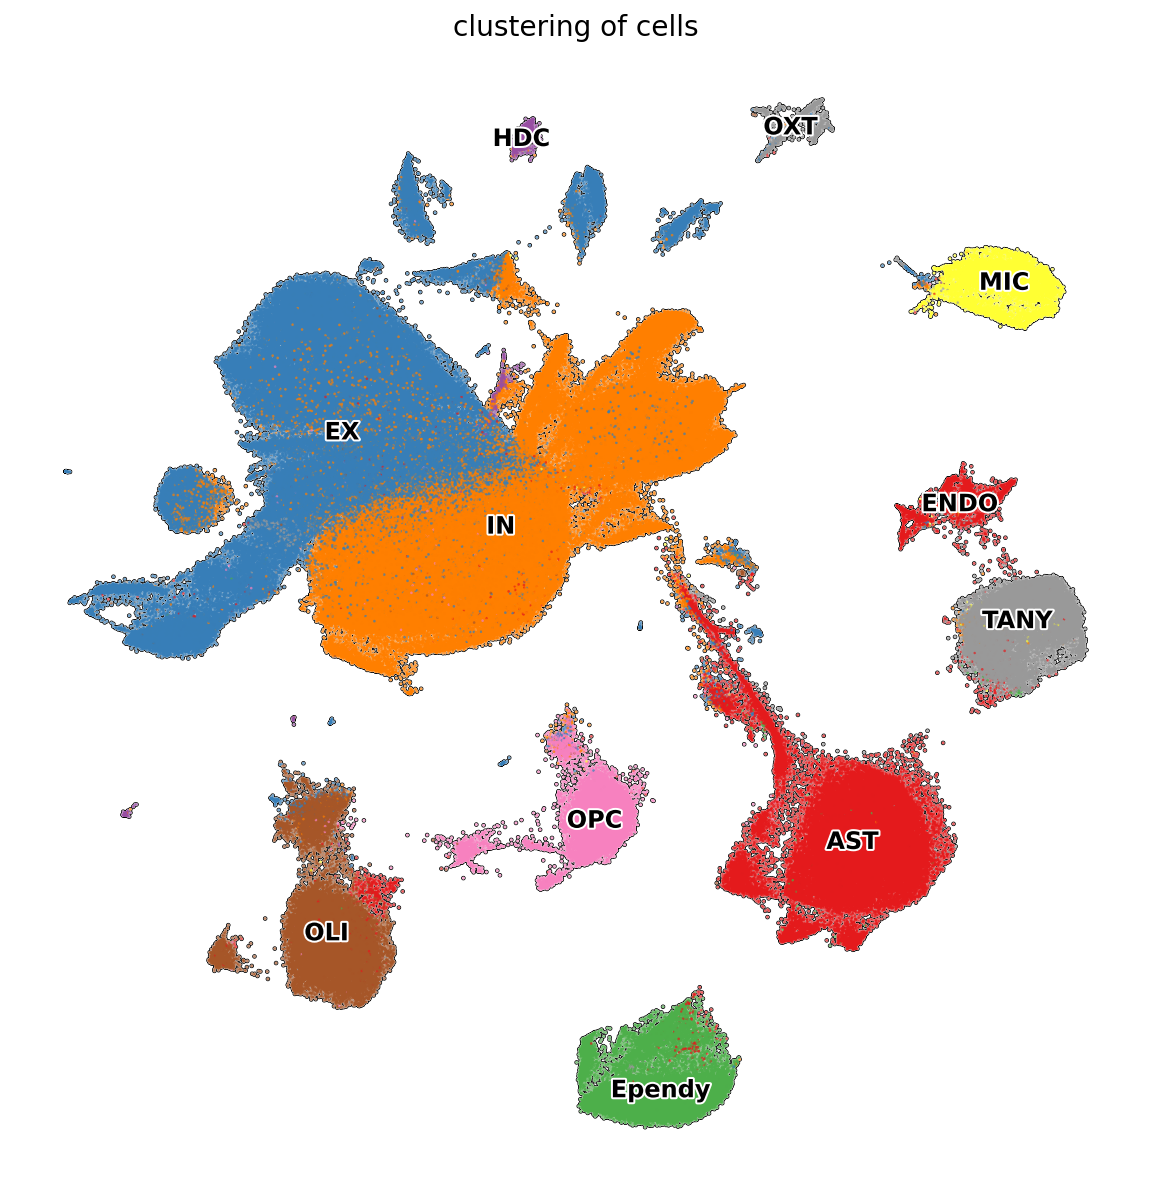

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
with plt.rc_context():
    sc.pl.umap(adata, color='celltype'
               , add_outline=True
               , size=7
               , legend_loc='on data'
               , legend_fontsize=12
               , legend_fontoutline=2
               , frameon=False
               , palette='Set1'
               , title='clustering of cells')
    # plt.savefig("AllCell.png")

# Plot Marker gene heatmap

In [9]:
marker_genes_dict = {
    'EX': 'SLC17A6',
    'IN': ['SLC32A1', 'GAD2'],
    'OXT': 'OXT',
    'HDC': 'HDC',
    'AST': ['AGT', 'GFAP'],
    'ENDO': 'FN1',
    'Ependy': 'CCDC153',
    'TANY': 'RAX',
    'MIC': ['C1QA', 'CX3CR1'],
    'OLI': ['MOG', 'PLP1'],
    'OPC': 'PDGFRA'
}

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_celltype']`


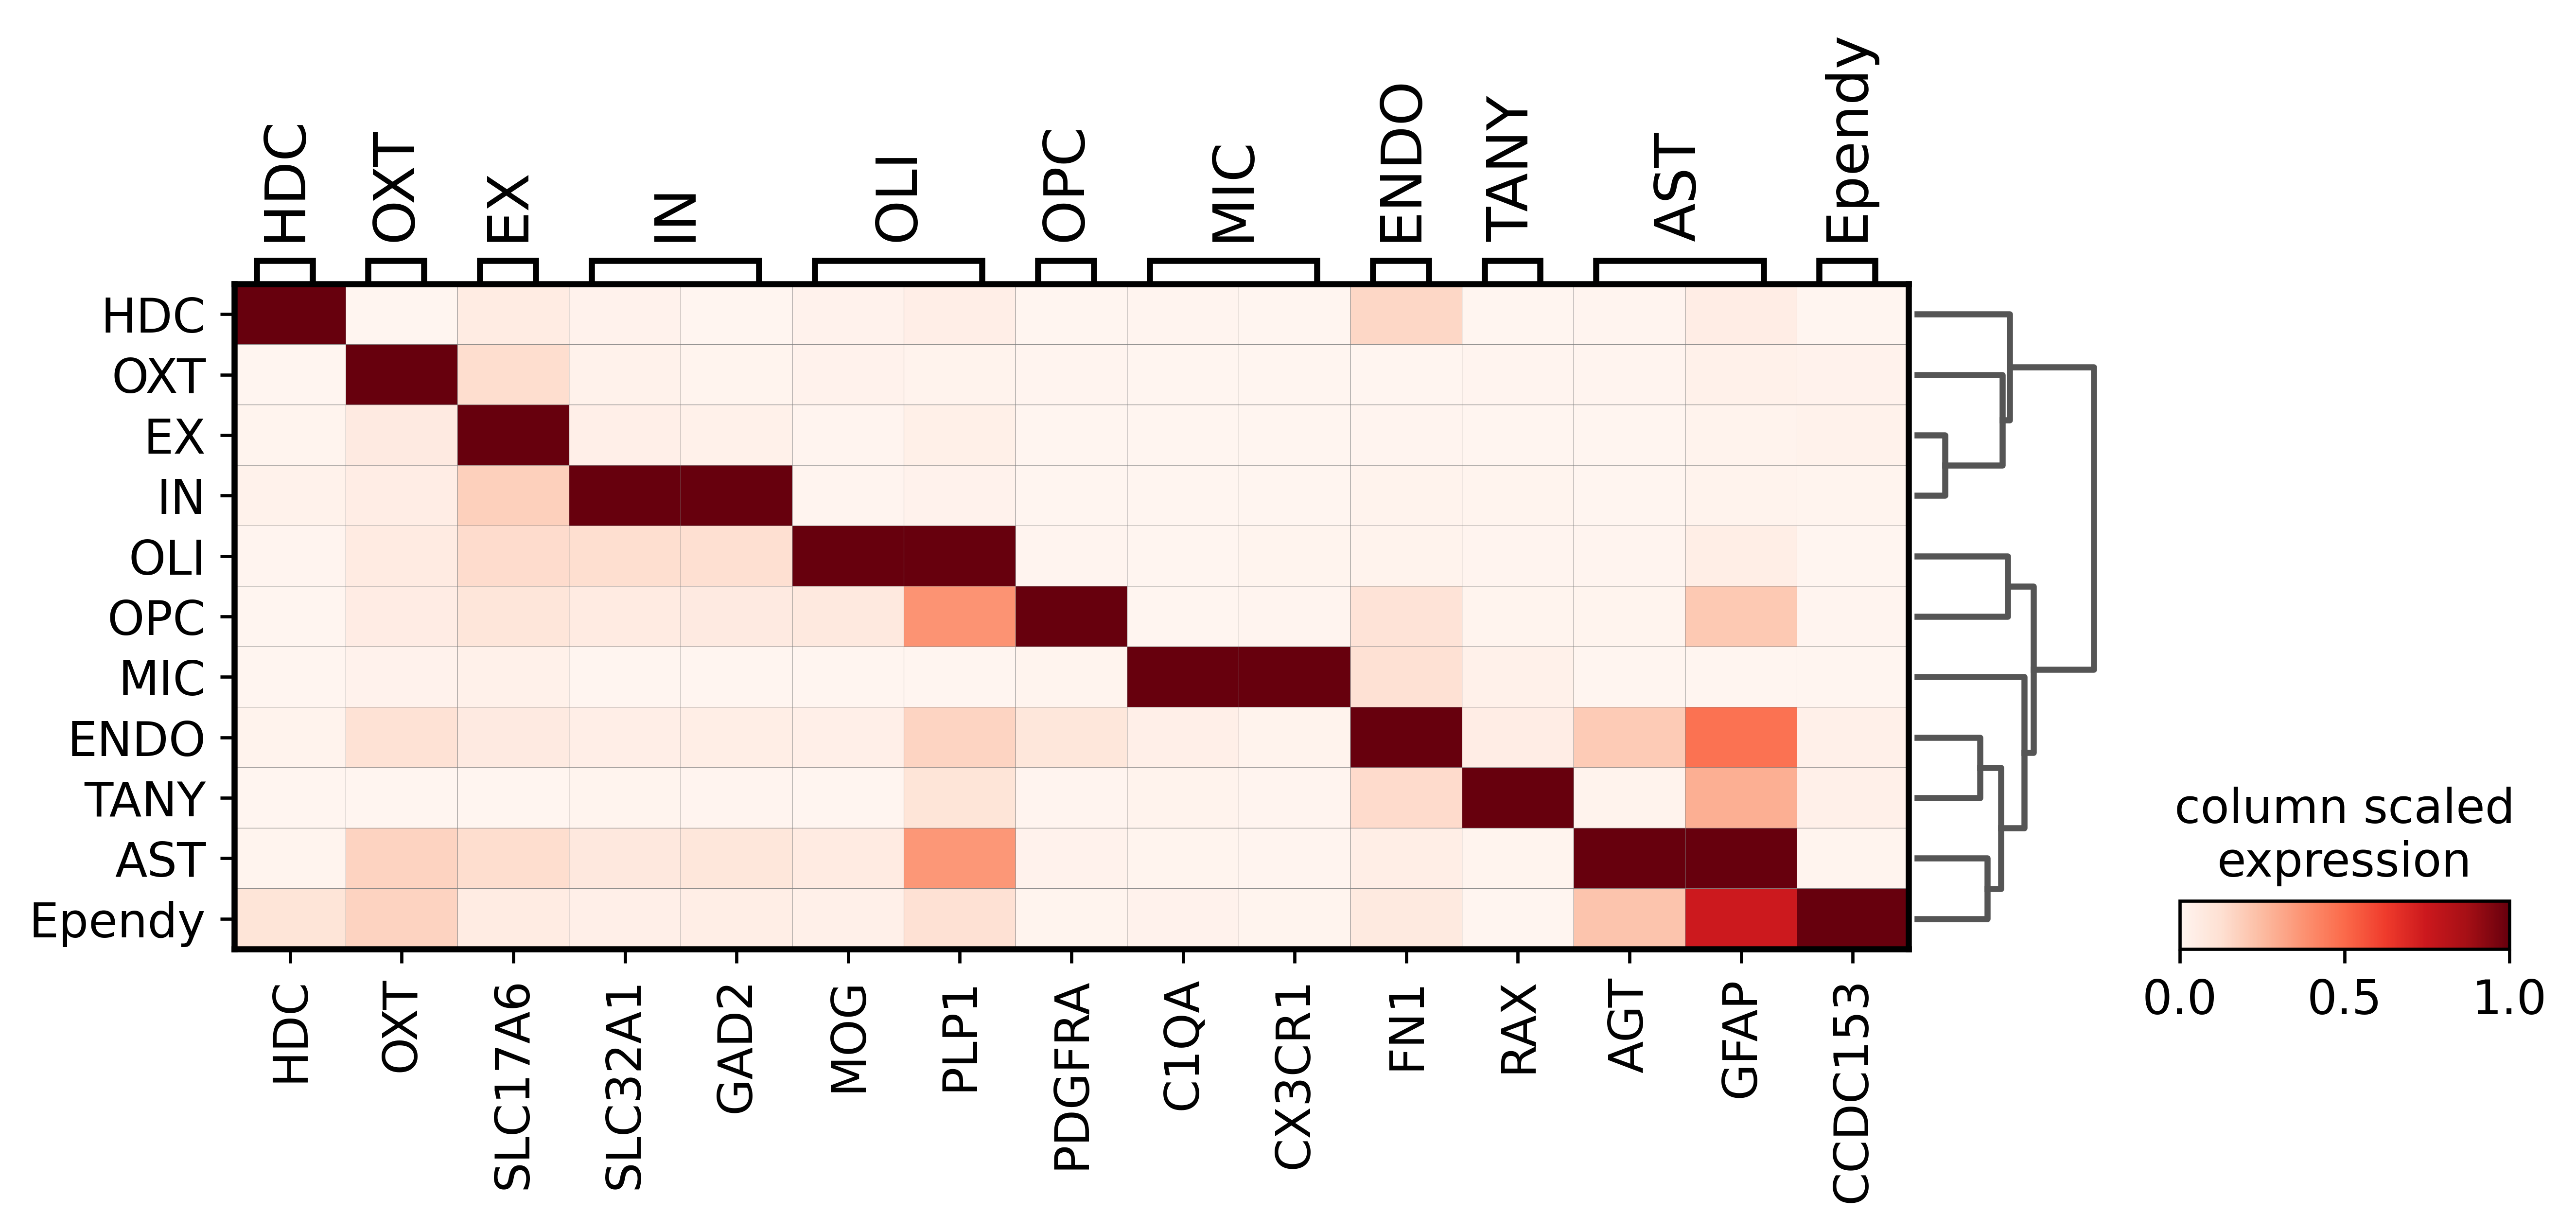

In [10]:
# sc.pl.tracksplot(adata, marker_genes_dict, groupby='celltype')
# sc.pl.heatmap(adata, marker_genes_dict, groupby='celltype', use_raw=True)
# sc.pl.heatmap(adata, marker_genes_dict, groupby='celltype', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))
sc.pl.matrixplot(adata, marker_genes_dict, 'celltype', dendrogram=True
                 , cmap='Reds', standard_scale='var'
                 # , categories_order=['EX', 'IN', 'OXT', 'HDC', 'AST', 'ENDO', 'Ependy', 'TANY', 'MIC', 'OLI', 'OPC']
                 , colorbar_title='column scaled\nexpression'
                 , save="marker_gene_plot.pdf"
                 , figsize=[10, 3])